<a href="https://colab.research.google.com/github/chloepalin/chloepalin.github.io/blob/master/AnimalClass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

In [3]:
# Skip this cell if you already have duckduckgo_search installed
!pip install -Uqq duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.30.0 which is incompatible.


In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [5]:
urls = search_images('lion', max_images=1)
urls[0]

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'http://upload.wikimedia.org/wikipedia/commons/4/49/Male_Lion_on_Rock.jpg'

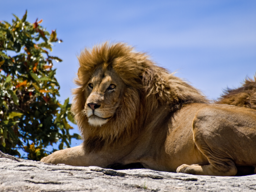

In [6]:
from fastdownload import download_url
dest = 'lion.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


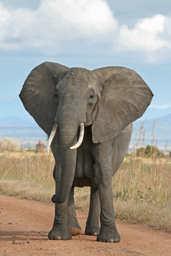

In [7]:
download_url(search_images('elephant photos', max_images=1)[0], 'elephant.jpg', show_progress=False)
Image.open('elephant.jpg').to_thumb(256,256)

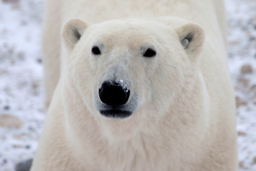

In [8]:
download_url(search_images('polar bear photos', max_images=1)[0], 'polarbear.jpg', show_progress=False)
Image.open('polarbear.jpg').to_thumb(256,256)

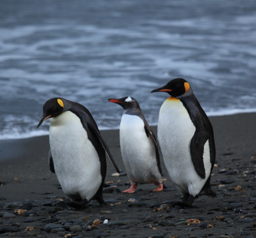

In [9]:
download_url(search_images('penguin photos', max_images=1)[0], 'penguin.jpg', show_progress=False)
Image.open('penguin.jpg').to_thumb(256,256)

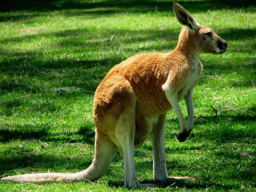

In [10]:
download_url(search_images('kangaroo photos', max_images=1)[0], 'kangaroo.jpg', show_progress=False)
Image.open('kangaroo.jpg').to_thumb(256,256)

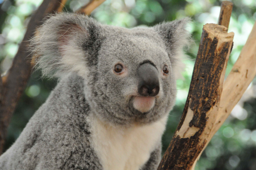

In [11]:
download_url(search_images('koala photos', max_images=1)[0], 'koala.jpg', show_progress=False)
Image.open('koala.jpg').to_thumb(256,256)

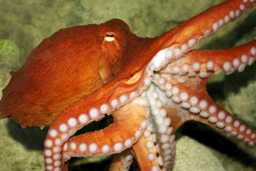

In [12]:
download_url(search_images('octopus photos', max_images=1)[0], 'octopus.jpg', show_progress=False)
Image.open('octopus.jpg').to_thumb(256,256)

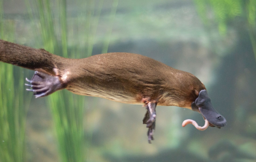

In [13]:
download_url(search_images('platypus photos', max_images=1)[0], 'platypus.jpg', show_progress=False)
Image.open('platypus.jpg').to_thumb(256,256)

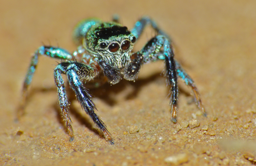

In [14]:
download_url(search_images('spider photos', max_images=1)[0], 'spider.jpg', show_progress=False)
Image.open('spider.jpg').to_thumb(256,256)

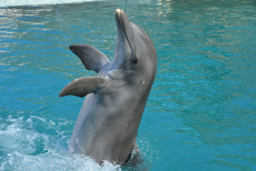

In [15]:
download_url(search_images('dolphin photos', max_images=1)[0], 'dolphin.jpg', show_progress=False)
Image.open('dolphin.jpg').to_thumb(256,256)

In [16]:
searches = 'lion','elephant', 'polar bear', 'penguin','kangaroo', 'koala', 'octopus', 'platypus', 'spider', 'dolphin'
path = Path('animal_classifier')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=500, dest=path/o)

In [17]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

27

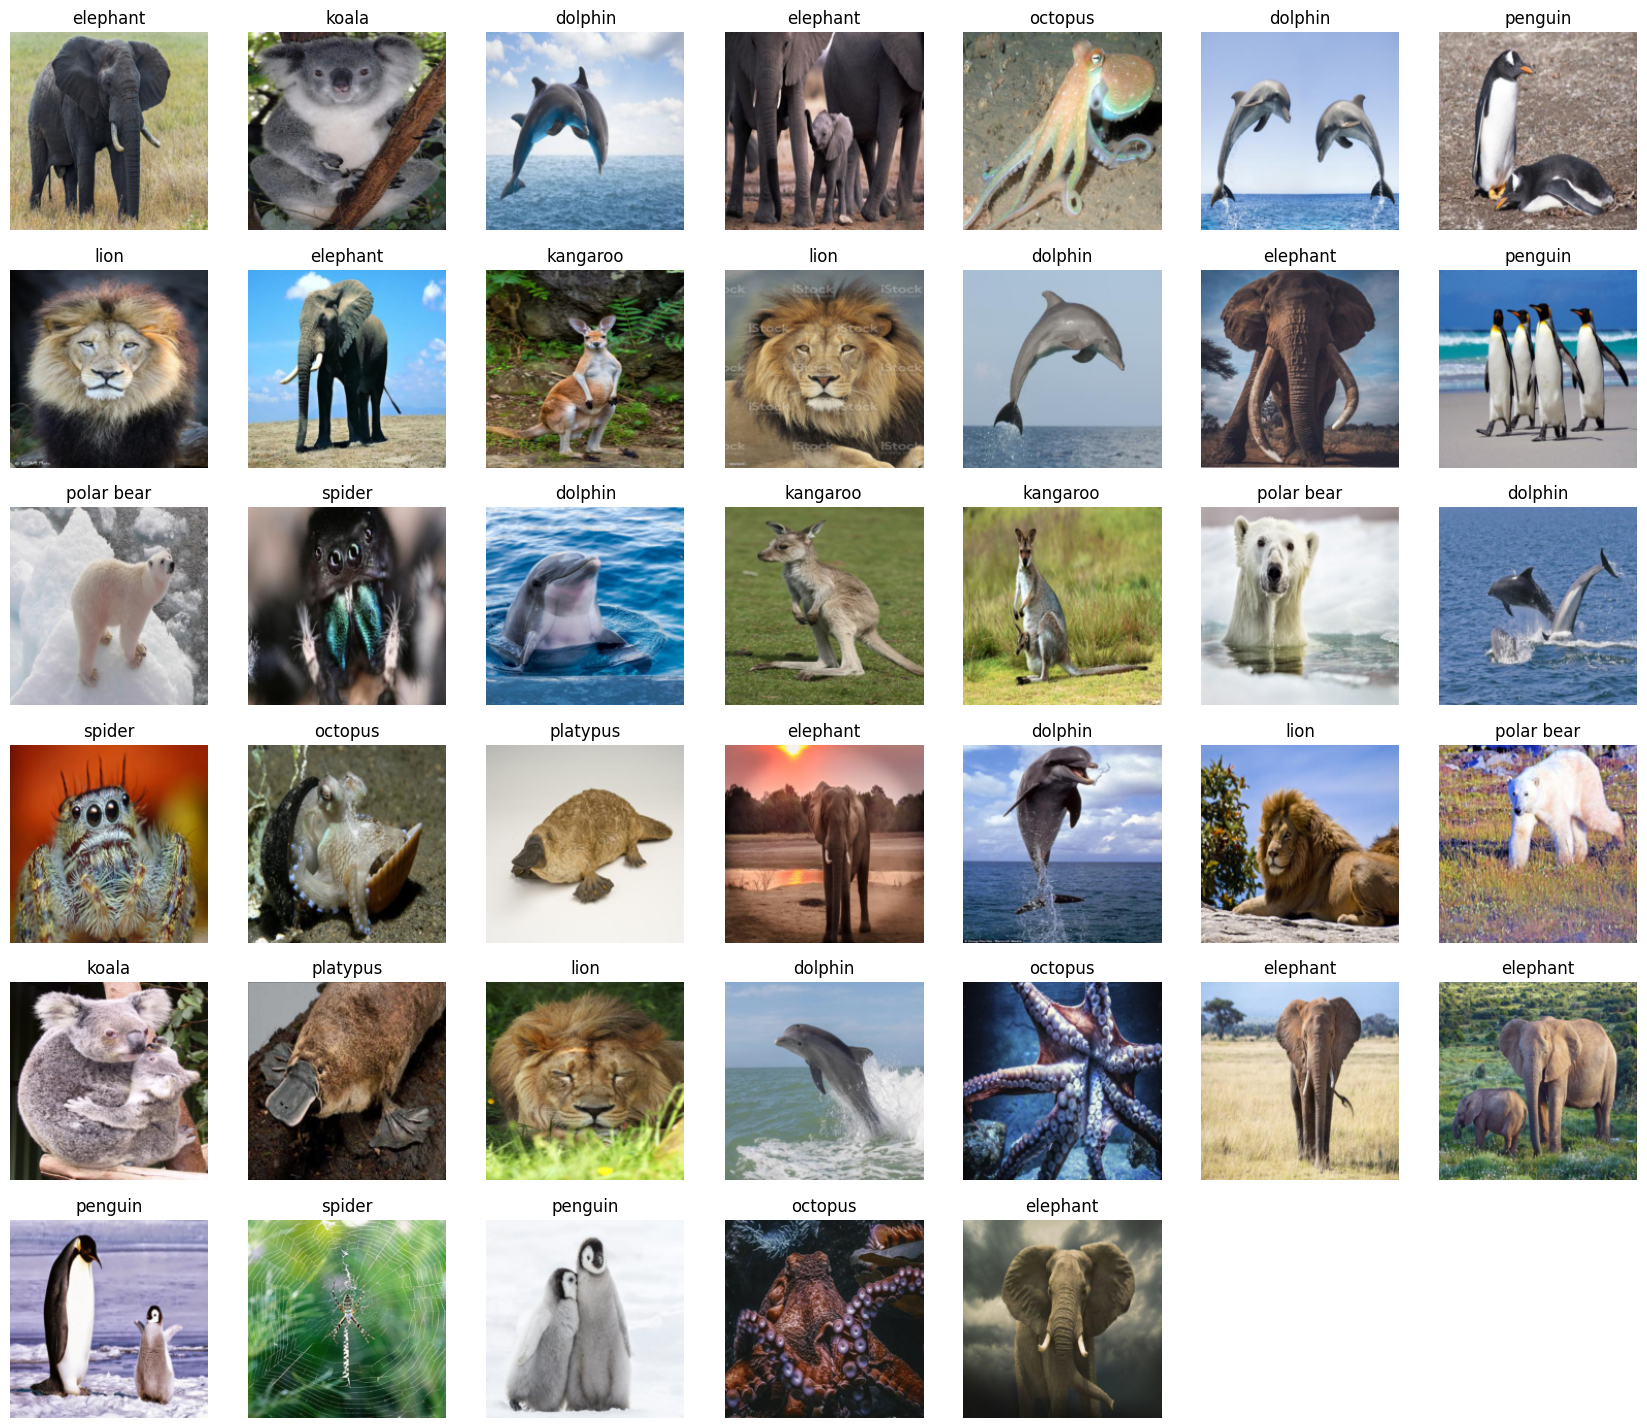

In [18]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=40)

In [19]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 78.8MB/s]


In [20]:
is_lion,_,probs = learn.predict(PILImage.create('lion.jpg'))
is_elephant,_,probs = learn.predict(PILImage.create('elephant.jpg'))
is_polar_bear,_,probs = learn.predict(PILImage.create('polarbear.jpg'))
is_penguin,_,probs = learn.predict(PILImage.create('penguin.jpg'))
is_kangaroo,_,probs = learn.predict(PILImage.create('kangaroo.jpg'))
is_koala,_,probs = learn.predict(PILImage.create('koala.jpg'))
is_octopus,_,probs = learn.predict(PILImage.create('octopus.jpg'))
is_platypus,_,probs = learn.predict(PILImage.create('platypus.jpg'))
is_spider,_,probs = learn.predict(PILImage.create('spider.jpg'))
is_dolphin,_,probs = learn.predict(PILImage.create('dolphin.jpg'))

print(f"This is a: {is_lion}.")
print(f"Probability it's a lion: {probs[0]:.4f}")
print(f"This is a: {is_elephant}.")
print(f"Probability it's a elephant: {probs[0]:.4f}")
print(f"This is a: {is_polar_bear}.")
print(f"Probability it's a polar bear: {probs[0]:.4f}")
print(f"This is a: {is_penguin}.")
print(f"Probability it's a penguin: {probs[0]:.4f}")
print(f"This is a: {is_kangaroo}.")
print(f"Probability it's a kangaroo: {probs[0]:.4f}")
print(f"This is a: {is_koala}.")
print(f"Probability it's a koala: {probs[0]:.4f}")
print(f"This is a: {is_octopus}.")
print(f"Probability it's a octopus: {probs[0]:.4f}")
print(f"This is a: {is_platypus}.")
print(f"Probability it's a platypus: {probs[0]:.4f}")
print(f"This is a: {is_spider}.")
print(f"Probability it's a spider: {probs[0]:.4f}")
print(f"This is a: {is_dolphin}.")
print(f"Probability it's a dolphin: {probs[0]:.4f}")

This is a: lion.
Probability it's a lion: 0.9999
This is a: elephant.
Probability it's a elephant: 0.9999
This is a: polar bear.
Probability it's a polar bear: 0.9999
This is a: penguin.
Probability it's a penguin: 0.9999
This is a: kangaroo.
Probability it's a kangaroo: 0.9999
This is a: koala.
Probability it's a koala: 0.9999
This is a: octopus.
Probability it's a octopus: 0.9999
This is a: platypus.
Probability it's a platypus: 0.9999
This is a: spider.
Probability it's a spider: 0.9999
This is a: dolphin.
Probability it's a dolphin: 0.9999


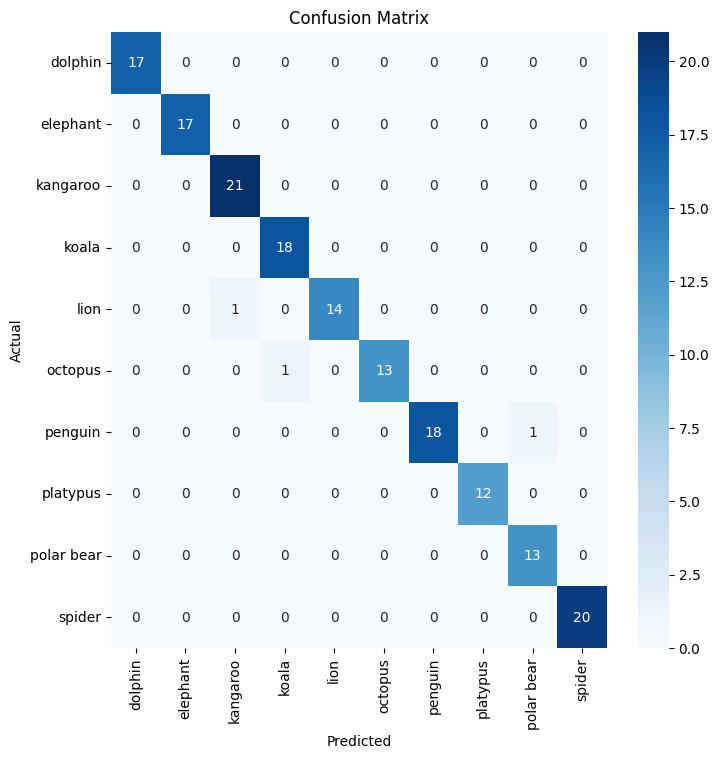

In [21]:
from fastai.vision.all import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predictions and targets for the validation dataset
preds, targets = learn.get_preds(dl=dls.valid)

# Compute the confusion matrix
cm = confusion_matrix(preds.argmax(dim=-1), targets)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=learn.dls.vocab, yticklabels=learn.dls.vocab)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [23]:
learn.model


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [24]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [25]:
embeddings = learn.get_preds(with_input=True)[0].numpy()

In [26]:
num_samples, num_classes, height, width = embeddings.shape
embeddings_2d = embeddings.reshape(num_samples, num_classes * height * width)

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_2d)


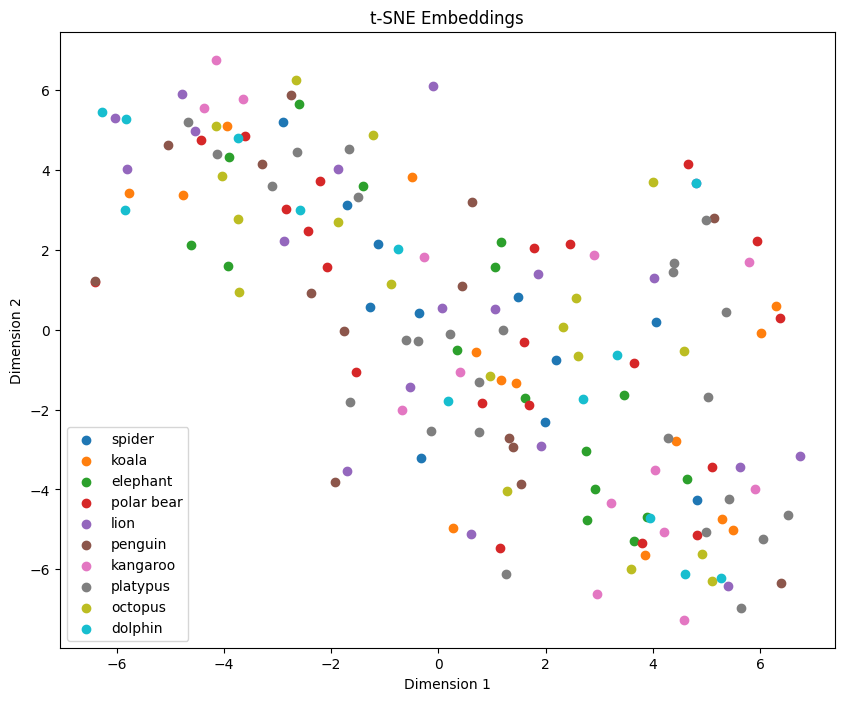

In [27]:
labels = [str(parent.parent.name) for parent in dls.train.items]
plt.figure(figsize=(10, 8))
unique_labels = list(set(labels))
for label in unique_labels:
    indices = [i for i, x in enumerate(labels) if x == label]
    valid_indices = [i for i in indices if i < len(embeddings_tsne)]
    plt.scatter(embeddings_tsne[valid_indices, 0], embeddings_tsne[valid_indices, 1], label=label)
plt.title("t-SNE Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


In [28]:
from google.colab import drive

# mount will create a folder at the left folder section on the page, but it will take a minute or so to see it

drive.mount('/content/drive') 

!zip -r animal_classifier.zip animal_classifier

!cp animal_classifier.zip /content/drive/My\ Drive/ 

Mounted at /content/drive
  adding: animal_classifier/ (stored 0%)
  adding: animal_classifier/octopus/ (stored 0%)
  adding: animal_classifier/octopus/1fe7174d-f3e1-4c77-b74a-1cd248c5e76d.jpg (deflated 1%)
  adding: animal_classifier/octopus/75a0da56-7989-4309-8fe0-3856983e4655.jpg (deflated 1%)
  adding: animal_classifier/octopus/d10769fe-ba13-4961-9831-ce55d72a8b73.jpg (deflated 1%)
  adding: animal_classifier/octopus/99b2d21d-c867-4908-895d-dd279f14f412.jpg (deflated 0%)
  adding: animal_classifier/octopus/6d5109c0-d7d7-4f9b-88fc-8d121988d917.jpg (deflated 1%)
  adding: animal_classifier/octopus/fded0a5d-5627-431c-ac8b-e4691d9dbb38.jpg (deflated 1%)
  adding: animal_classifier/octopus/439fe252-4e33-4398-94d5-ef1e54f2cfeb.jpg (deflated 0%)
  adding: animal_classifier/octopus/195e4313-03fa-4176-84af-61e810c140b6.png (deflated 0%)
  adding: animal_classifier/octopus/13363388-98fe-40dd-8449-e43c8e77432c.jpg (deflated 1%)
  adding: animal_classifier/octopus/1ff66c7b-7a20-4162-8c38-5ed4c

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!unzip '/content/drive/MyDrive/animal_classifier.zip'